## Install the python package

In [1]:
!pip install useful_rdkit_utils mols2grid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 KB 4.9 MB/s eta 0:00:00
  Created wheel for useful_rdkit_utils: filename=useful_rdkit_utils-0.2.5-py3-none-any.whl size=18280 sha256=fd8febd308151617661ca74d2522f8d7270377e118fd26a04da7201e0a9766b4
  Stored in directory: /root/.cache/pip/wheels/b3/a0/43/8c45675cd5a260848e4ba281da83ea94b42f1533e025c10320
Successfully built useful_rdkit_utils


In [2]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdRGroupDecomposition
import pandas as pd
import mols2grid
import useful_rdkit_utils as uru
from ipywidgets import interact

## Read the Input Data
We begin by reading a set of molecules from a csv file. The csv file has the SMILES, Name, and pIC50 for the molecules. We'd like to find molecules with a common scaffold, then use that scaffold and decompose the molecules into R-groups around the common scaffold.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/data/CHEMBL1075104.smi",names=["SMILES","Name","pIC50"])

## Cluster the Input Data to Identify Similar Molecules
We'll begin by adding an RDKit molecule and a fingerprint to each molecule.

In [4]:
df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)
df['fp'] = df.mol.apply(uru.mol2morgan_fp)

In order to find molecules with a common scaffold, we'll cluster the molecules using the Butina clustering method in the RDKit.

In [5]:
df['cluster'] = uru.taylor_butina_clustering(df.fp.values)

Let's look at the sizes of the clusters.

In [9]:
df.cluster.value_counts()

0      73
2      29
1      26
3      24
7      14
       ..
212     1
106     1
213     1
214     1
110     1
Name: cluster, Length: 310, dtype: int64

## View the Largest Cluster and Identify the Common Scaffold

View the Largest Cluster and Identify the Common Scaffold

In [11]:
mols2grid.display(df.query("cluster == 0"),mol_col="mol",subset=["img"])

/usr/local/lib/python3.9/dist-packages/mols2grid/select.py:25: UserWarning: Overwriting non-empty 'default' grid selection: {0: 'CNc1nc(Nc2ccc(C(=O)N3CCOCC3)cc2OC)ncc1Cl', 1: 'CNc1nc(Nc2ccc(C(=O)N3CCOCC3)cc2OC)ncc1C(F)(F)F', 2: 'CNc1nc(Nc2ccc(C(=O)N3CCOCC3)cc2OC)ncc1F', 3: 'CNc1nc(Nc2ccc(C(=O)N3CCOCC3)cc2OC)ncc1Br', 4: 'CNc1nc(Nc2ccc(C(=O)N3CCOCC3)cc2Br)ncc1Cl', 5: 'CNc1nc(Nc2ccc(C(=O)N3CCOCC3)cc2C)ncc1Cl', 6: 'CNc1nc(Nc2ccc(C(=O)N3CCOCC3)cc2)ncc1Cl', 7: 'COc1cc(C(=O)N2CCOCC2)ccc1Nc1ncc(Br)c(OC)n1', 8: 'COc1cc(C(=O)N2CCOCC2)ccc1Nc1ncc(Cl)c(OC)n1', 9: 'CNc1nc(Nc2ccc(C(=O)N(C)C)cc2OC)ncc1Cl', 10: 'CNc1nc(Nc2ccc(C(=O)NC3CC3)cc2OC)ncc1Cl', 11: 'CNc1nc(Nc2ccc(C(=O)N3CCOCC3)cc2OC(F)F)ncc1Cl', 12: 'CNc1nc(Nc2ccc(C(=O)N3CCN4CCCCC4C3)cc2OC)ncc1Cl', 13: 'CNc1nc(Nc2ccc(C(=O)N3CC(C)CC(C)C3)cc2OC)ncc1Cl', 14: 'CNc1nc(Nc2ccc(C(=O)N3CCCCC3)cc2OC)ncc1Cl', 15: 'CNc1nc(Nc2ccc(C(=O)N3CCC3)cc2OC)ncc1Cl', 16: 'CNc1nc(Nc2ccc(C(=O)N3CCC(F)(F)CC3)cc2OC)ncc1Cl', 17: 'CNc1nc(Nc2ccc(C(=O)N3CCN(C(C)=O)CC3)cc2OC)n

MolGridWidget()

At first glance, it looks like the structure below is the scaffold. Try searching the structures with that scaffold.



*   Click on the arrow next to the magnifying glass in the grid above and select SMARTS.\
*   Paste the SMILES from the box below into the Search box.




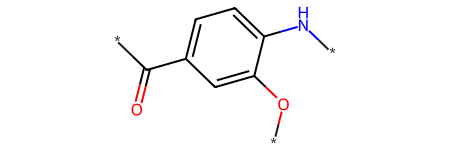

In [12]:
Chem.MolFromSmiles("[*]C(=O)c1ccc(N[*])c(O[*])c1")

We can sketch the scaffold with R-groups in place and save the core with R-groups to a molfile. I sketched this with Marvin Sketch but you should be able to use any chemical sketcher.

In [14]:
mb = """
  Mrv2004 04242220562D          

 13 13  0  0  0  0            999 V2000
   -1.0632    2.0028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7777    1.5903    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7777    0.7652    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0632    0.3527    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3488    0.7652    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3488    1.5903    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3321    1.9834    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4922    2.0028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4922    2.8278    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3057    0.2630    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2067    1.5903    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    1.0466    1.5709    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    0.3057   -0.5620    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0  0  0  0
  2  3  1  0  0  0  0
  3  4  2  0  0  0  0
  4  5  1  0  0  0  0
  5  6  2  0  0  0  0
  1  6  1  0  0  0  0
  6  7  1  0  0  0  0
  2  8  1  0  0  0  0
  8  9  2  0  0  0  0
  5 10  1  0  0  0  0
  8 11  1  0  0  0  0
  7 12  1  0  0  0  0
 10 13  1  0  0  0  0
M  RGP  3  11   1  12   2  13   3
M  END
"""

We can then convert the molfile to an RDKit molecule.

In [15]:
core = Chem.MolFromMolBlock(mb)

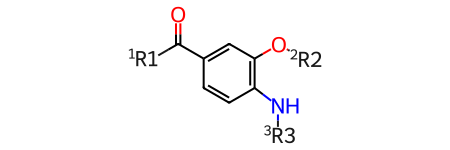

In [16]:
core

Create a new dataset of cluster 0

In [17]:
df_0 = df.query("cluster == 0").copy()

Create index to keep track

In [18]:
df_0['index'] = range(0,len(df_0))

## Perform the R-group Decomposition

As mentioned above, we're using the function rdRGroupDecomposition.RGroupDecompose from the RDKit. Note that RDKit returns two values from this function.

* rgd - a dictionary containing the results of the R-group decomposition. This dictionary has keys containing the core with a key "Core", and the R-groups in keys named "R1", "R2", etc. Each dictionary key links to a list of cores or R-groups corresponding input molecules that matched the core (didn't fail).

* failed - a list containing the indices of molecules that did not match the core.

In [19]:
rgd,failed = rdRGroupDecomposition.RGroupDecompose([core],df_0.mol.values,asRows=False)

[20:00:21] No core matches
[20:00:21] No core matches
[20:00:21] No core matches
[20:00:21] No core matches
[20:00:21] No core matches
[20:00:21] No core matches
[20:00:21] No core matches
[20:00:21] No core matches
[20:00:21] No core matches
[20:00:21] No core matches
[20:00:21] No core matches


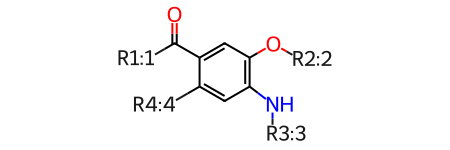

In [20]:
rgd['Core'][0]

Note this core has 4 R-groups, while our input core has 3. Scroll up and see for yourself. This is very cool! The RDKit noticed another point of substitution and added an R-group for us.

Here are the indices of the molecules that failed.

In [21]:
failed

[4, 5, 6, 46, 48, 52, 57, 58, 64, 68, 70]

Let's look at the molecules that failed and try to figure out why. These results make sense.

* Molecule 4 has a Br in place of the O in the core
* Molecule 5 has a methyl in place of the oxygen in the core
* Molecule 6 does not have an O connected to the core
etc
* In some cases, we may want to go back and modify our core definition to include these molecules. In this case, we'll just skip them.

In [22]:
mols2grid.display(df_0.iloc[failed],mol_col="mol",subset=["img","index"])

MolGridWidget()

Now we want to delete the rows corresponding to molecules that failed the R-group decomposition from df_O. Since we created df_O from df, it inherited the original dataframe's index. We'll call reset_index to create a new index that simply numbers the rows from 0 to len(df_0).

In [23]:
df_0.reset_index(inplace=True)
df_0 = df_0.drop(failed,axis=0)

In [24]:
r_groups = [x for x in rgd.keys() if x != "Core"]
r_groups

['R1', 'R2', 'R3', 'R4']

In [25]:
for r in sorted(r_groups):
    df_0[r] = rgd[r]
    df_0[r] = df_0[r].apply(Chem.MolToSmiles)

## View the R-groups and Their Frequency
Create an interactive viewer for the R-groups that shows how many times each R-group was used. Use the menu below to toggle between R1, R2, R3, and R4.

In [29]:
@interact(rg=r_groups)
def display_rgroups(rg):
    vc_df = uru.value_counts_df(df_0,rg)
    return mols2grid.display(vc_df,smiles_col=rg,subset=["img","count"])

interactive(children=(Dropdown(description='rg', options=('R1', 'R2', 'R3', 'R4'), value='R1'), Output()), _do…